# Expected Threat

https://karun.in/blog/expected-threat.html
https://soccerment.com/expected-threat/

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [56]:
df = pd.read_csv('Game_Data.csv')
df

,id,event_id,minute,second,team_id,player_id,x,y,end_x,end_y,...,card_type,is_goal,type_display_name,outcome_type_display_name,period_display_name,player_id.1,shirt_no,name,position,team_id.1
0,2635476911,3,0,0.0,51,349660,50.1,50.1,55.3,52.4,...,False,False,Pass,Successful,FirstHalf,349660,8,Manu Morlanes,MC,51
1,2635477071,4,0,1.0,51,6227,55.4,48.6,44.6,13.0,...,False,False,Pass,Successful,FirstHalf,6227,14,Dani Rodríguez,ML,51
2,2635477227,5,0,6.0,51,377219,41.9,9.9,30.3,27.3,...,False,False,Pass,Successful,FirstHalf,377219,20,Giovanni González,DC,51
3,2635477333,6,0,13.0,51,294006,34.2,42.3,28.3,68.9,...,False,False,Pass,Successful,FirstHalf,294006,21,Antonio Raíllo,DC,51
4,2635477477,7,0,16.0,51,444252,28.2,68.8,6.1,52.1,...,False,False,Pass,Successful,FirstHalf,444252,6,Copete,DC,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,2635634945,829,93,24.0,62,399952,33.9,88.2,NaN,NaN,...,False,False,Challenge,Unsuccessful,SecondHalf,399952,29,Miguel Rodríguez,Sub,62
1550,2635634985,938,93,24.0,51,273229,66.1,11.8,NaN,NaN,...,False,False,TakeOn,Successful,SecondHalf,273229,17,Cyle Larin,FW,51
1551,2635635071,940,93,33.0,51,273229,91.8,6.9,NaN,NaN,...,False,False,Tackle,Unsuccessful,SecondHalf,273229,17,Cyle Larin,FW,51
1552,2635635095,832,93,35.0,62,136987,8.7,93.0,NaN,NaN,...,False,False,Foul,Successful,SecondHalf,136987,5,Renato Tapia,MC,62


In [57]:
# keeping only celta vigo records and Renato Tapia's passes (id=136987)
df = df.loc[(df['team_id'] ==62) & (df['player_id']==136987) & (df['type_display_name']=='Pass') & (df['outcome_type_display_name']=='Successful')]
df.reset_index(inplace=True)
df.head()

,index,id,event_id,minute,second,team_id,player_id,x,y,end_x,...,card_type,is_goal,type_display_name,outcome_type_display_name,period_display_name,player_id.1,shirt_no,name,position,team_id.1
0,106,2635486463,50,5,57.0,62,136987,52.4,79.4,53.4,...,False,False,Pass,Successful,FirstHalf,136987,5,Renato Tapia,MC,62
1,114,2635487309,58,6,34.0,62,136987,67.3,6.2,70.8,...,False,False,Pass,Successful,FirstHalf,136987,5,Renato Tapia,MC,62
2,120,2635487711,62,6,51.0,62,136987,60.4,3.5,54.6,...,False,False,Pass,Successful,FirstHalf,136987,5,Renato Tapia,MC,62
3,122,2635487921,64,6,53.0,62,136987,56.0,4.6,42.4,...,False,False,Pass,Successful,FirstHalf,136987,5,Renato Tapia,MC,62
4,127,2635488133,69,7,9.0,62,136987,56.5,72.0,53.8,...,False,False,Pass,Successful,FirstHalf,136987,5,Renato Tapia,MC,62


In [58]:
# this simulates the xT scores for each section of the field
xT = pd.read_csv('xT_Grid.csv', header=None)
xT

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.006383,0.007796,0.008449,0.009777,0.011263,0.012483,0.014736,0.017451,0.021221,0.027563,0.034851,0.037926
1,0.007501,0.008786,0.009424,0.010595,0.012147,0.013845,0.016118,0.018703,0.024015,0.029533,0.040670,0.046477
2,0.008880,0.009777,0.010013,0.011105,0.012692,0.014291,0.016856,0.019351,0.024122,0.028552,0.054911,0.064426
3,0.009411,0.010827,0.010165,0.011324,0.012626,0.014846,0.016895,0.019971,0.023851,0.035113,0.108051,0.257454
4,0.009411,0.010827,0.010165,0.011324,0.012626,0.014846,0.016895,0.019971,0.023851,0.035113,0.108051,0.257454
5,0.008880,0.009777,0.010013,0.011105,0.012692,0.014291,0.016856,0.019351,0.024122,0.028552,0.054911,0.064426
6,0.007501,0.008786,0.009424,0.010595,0.012147,0.013845,0.016118,0.018703,0.024015,0.029533,0.040670,0.046477
7,0.006383,0.007796,0.008449,0.009777,0.011263,0.012483,0.014736,0.017451,0.021221,0.027563,0.034851,0.037926


In [59]:
# converting values into an array
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

In [60]:
# categorize each record in a bin for starting point and ending point
df['x1_bin'] = pd.cut(df['x'], bins = xT_cols, labels=False)
df['y1_bin'] = pd.cut(df['y'], bins = xT_rows, labels=False)

df['x2_bin'] = pd.cut(df['end_x'], bins = xT_cols, labels=False)
df['y2_bin'] = pd.cut(df['end_y'], bins = xT_rows, labels=False)

/var/folders/7x/mwsg2nfd0gsf5h73ty0mnrb80000gn/T/ipykernel_97102/3452928299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x1_bin'] = pd.cut(df['x'], bins = xT_cols, labels=False)
/var/folders/7x/mwsg2nfd0gsf5h73ty0mnrb80000gn/T/ipykernel_97102/3452928299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y1_bin'] = pd.cut(df['y'], bins = xT_rows, labels=False)
/var/folders/7x/mwsg2nfd0gsf5h73ty0mnrb80000gn/T/ipykernel_97102/3452928299.py:5: SettingWithCopyWarning: 
A value is trying to be set

In [61]:
df.head()

,index,id,event_id,minute,second,team_id,player_id,x,y,end_x,...,period_display_name,player_id.1,shirt_no,name,position,team_id.1,x1_bin,y1_bin,x2_bin,y2_bin
0,106,2635486463,50,5,57.0,62,136987,52.4,79.4,53.4,...,FirstHalf,136987,5,Renato Tapia,MC,62,6,6,6,0
1,114,2635487309,58,6,34.0,62,136987,67.3,6.2,70.8,...,FirstHalf,136987,5,Renato Tapia,MC,62,8,0,9,0
2,120,2635487711,62,6,51.0,62,136987,60.4,3.5,54.6,...,FirstHalf,136987,5,Renato Tapia,MC,62,7,0,6,0
3,122,2635487921,64,6,53.0,62,136987,56.0,4.6,42.4,...,FirstHalf,136987,5,Renato Tapia,MC,62,6,0,4,2
4,127,2635488133,69,7,9.0,62,136987,56.5,72.0,53.8,...,FirstHalf,136987,5,Renato Tapia,MC,62,7,5,6,7


In [62]:
# define the start zone and end zone values of passes (kinda like x,y coordinates in a map plot)
df['start_zone_value'] = df[['x1_bin', 'y1_bin']].apply(lambda x: xT[x[1]][x[0]],axis=1)
df['end_zone_value'] = df[['x2_bin', 'y2_bin']].apply(lambda x: xT[x[1]][x[0]],axis=1)

# the difference of end_zone and start_zone is the expected threat value for the action (pass) - not accounting for dribble xT here
# value can be negative or positive (progressive)
df['Pass xT'] = df['end_zone_value'] - df['start_zone_value']
# progressive xT measures progressive passes
df['Progressive xT'] = ''

/var/folders/7x/mwsg2nfd0gsf5h73ty0mnrb80000gn/T/ipykernel_97102/1828087819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_zone_value'] = df[['x1_bin', 'y1_bin']].apply(lambda x: xT[x[1]][x[0]],axis=1)
/var/folders/7x/mwsg2nfd0gsf5h73ty0mnrb80000gn/T/ipykernel_97102/1828087819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['end_zone_value'] = df[['x2_bin', 'y2_bin']].apply(lambda x: xT[x[1]][x[0]],axis=1)
/var/folders/7x/mwsg2nfd0gsf5h73ty0mnrb80000gn/T/ipykernel_97102/1828087819.py:7

In [63]:
# iterate and fill values for Progressive xT
counter = 0 

while counter < len(df):
    if df['Pass xT'][counter] > 0:
        df['Progressive xT'][counter] = df['Pass xT'][counter]
    else:
        df['Progressive xT'][counter] = 0.00
    counter += 1

/var/folders/7x/mwsg2nfd0gsf5h73ty0mnrb80000gn/T/ipykernel_97102/18156965.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Progressive xT'][counter] = 0.00
/var/folders/7x/mwsg2nfd0gsf5h73ty0mnrb80000gn/T/ipykernel_97102/18156965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Progressive xT'][counter] = df['Pass xT'][counter]


In [64]:
df.head()

,index,id,event_id,minute,second,team_id,player_id,x,y,end_x,...,position,team_id.1,x1_bin,y1_bin,x2_bin,y2_bin,start_zone_value,end_zone_value,Pass xT,Progressive xT
0,106,2635486463,50,5,57.0,62,136987,52.4,79.4,53.4,...,MC,62,6,6,6,0,0.016118,0.014736,-0.001382,0.0
1,114,2635487309,58,6,34.0,62,136987,67.3,6.2,70.8,...,MC,62,8,0,9,0,0.021221,0.027563,0.006342,0.006342
2,120,2635487711,62,6,51.0,62,136987,60.4,3.5,54.6,...,MC,62,7,0,6,0,0.017451,0.014736,-0.002715,0.0
3,122,2635487921,64,6,53.0,62,136987,56.0,4.6,42.4,...,MC,62,6,0,4,2,0.014736,0.012692,-0.002044,0.0
4,127,2635488133,69,7,9.0,62,136987,56.5,72.0,53.8,...,MC,62,7,5,6,7,0.019351,0.014736,-0.004615,0.0


## xT Map

Using mplsoccer package (https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_plots/plot_lines.html#sphx-glr-gallery-pitch-plots-plot-lines-py)

In [65]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen

rcParams['text.color'] = '#c7d5cc'  # set the default text color

In [76]:
mask_positive = df['Progressive xT'] != 0

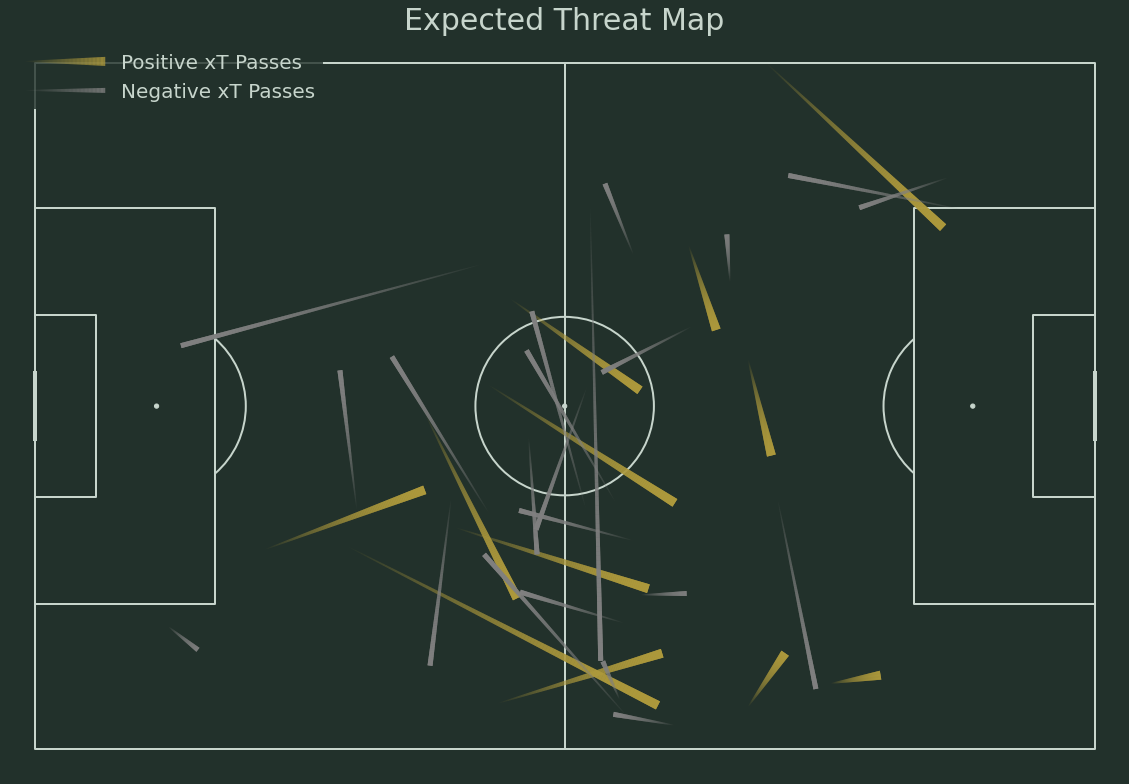

In [92]:
# Setup the pitch
pitch = Pitch(pitch_type='opta', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

lc1 = pitch.lines(df[mask_positive].x, df[mask_positive].y,
                  df[mask_positive].end_x, df[mask_positive].end_y,
                  lw=9, transparent=True, comet=True, label='Positive xT Passes',
                  color='#ad993c', ax=ax)

lc2 = pitch.lines(df[~mask_positive].x, df[~mask_positive].y,
                  df[~mask_positive].end_x, df[~mask_positive].end_y,
                  lw=5, transparent=True, comet=True, label='Negative xT Passes',
                  color='#808080', ax=ax)

# Plot the legend
ax.legend(facecolor='#22312b', edgecolor='None', fontsize=20, loc='upper left', handlelength=4)

# Set the title
ax_title = ax.set_title(f'Expected Threat Map', fontsize=30)